In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from matplotlib.pyplot import text

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.size'] = 16ho

In [3]:
import pickle


In [4]:

# results_azure2021clean_cfs
# results_azure2021clean_llf

# results_notraceclean_cfs
# results_notraceclean_llf

# results_randomclean_cfs
# results_randomclean_llf

dir = "./"

file_cfs = open(f'{dir}results_azure2021clean_cfs', 'rb')
file_llf = open(f'{dir}results_azure2021clean_llf', 'rb')
results_azure2021clean_cfs = pickle.load(file_cfs)
results_azure2021clean_llf = pickle.load(file_llf)

file_tuned_cfs = open(f'{dir}results_notraceclean_cfs', 'rb')
file_tuned_llf = open(f'{dir}results_notraceclean_llf', 'rb')
results_notraceclean_cfs = pickle.load(file_tuned_cfs)
results_notraceclean_llf = pickle.load(file_tuned_llf)

file_random_cfs = open(f'{dir}results_randomclean_cfs', 'rb')
file_random_llf = open(f'{dir}results_randomclean_llf', 'rb')
results_randomclean_cfs = pickle.load(file_random_cfs)
results_randomclean_llf = pickle.load(file_random_llf)


In [5]:
file_tuned = open(f'{dir}results_notraceftrace_cfs', 'rb')

file_cfs = open(f'{dir}results_azure2021ftrace_cfs', 'rb')

file_llf = open(f'{dir}results_azure2021ftrace_llf', 'rb')

results_tunedftrace_cfs = pickle.load(file_tuned)

results_azure2021ftrace_cfs = pickle.load(file_cfs)

results_azure2021ftrace_llf = pickle.load(file_llf)

processing 0 12
processing 1 24
processing 2 36
processing 3 48
processing 4 60
processing 5 72
processing 6 84
processing 7 96
processing 8 108
processing 9 120
processing 10 132
processing 11 144
processing 12 156
processing 13 168
processing 14 180
processing 15 192
processing 16 204
processing 17 216
processing 18 228
(c) average time per schedule()
(b) total time in schedule()


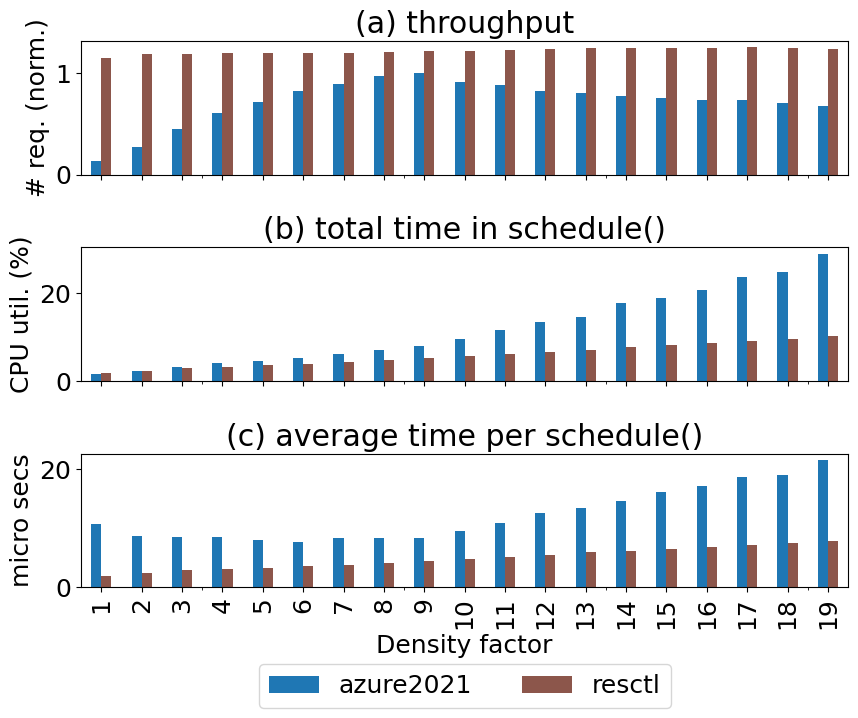

,schedule,schedule_time,schedule_time_avg,schedule_time_std,schedule_tuned,schedule_time_tuned,schedule_time_avg_tuned,schedule_time_std_tuned,func_count,density_factor,...,duration_tuned,duration_tuned_clean,tasks_running,tasks_running_clean,tasks_running_tuned,tasks_running_tuned_clean,overhead,overhead_tuned,util,util_tuned
0,0.115568,1.512930,10.679011,170339.400,0.698600,1.702815,1.871061,2940.055,12,1,...,100.956059,100.956059,8.003927,8.003927,100.346383,100.346383,0.015025,0.016867,0.079486,1.0
1,0.192192,2.163424,8.718101,32617.820,0.736257,2.289509,2.394874,2825.437,24,2,...,101.121415,101.121415,14.742228,14.742228,100.309500,100.309500,0.021467,0.022641,0.146284,1.0
2,0.277449,3.077114,8.564317,20850.370,0.761077,2.846308,2.876237,2381.205,36,3,...,101.181180,101.181180,24.173789,24.173789,100.339994,100.339994,0.030554,0.028131,0.240030,1.0
3,0.375153,4.088930,8.431053,11749.110,0.785197,3.109619,3.047310,2637.550,48,4,...,101.194434,101.194434,34.402640,34.402640,100.343032,100.343032,0.040628,0.030729,0.341827,1.0
4,0.440593,4.607142,8.055303,6601.979,0.816883,3.511874,3.307664,2388.055,60,5,...,101.147843,101.147843,41.922820,41.922820,100.353398,100.353398,0.045781,0.034720,0.416585,1.0
5,0.526454,5.268679,7.701807,4493.652,0.843898,3.939508,3.593681,1972.837,72,6,...,101.175907,101.175907,50.502880,50.502880,100.367053,100.367053,0.052335,0.038937,0.501652,1.0
6,0.570510,6.110003,8.235253,4565.904,0.865216,4.182278,3.718875,2118.942,84,7,...,101.176788,101.176788,58.069593,58.069593,100.349930,100.349930,0.060696,0.041336,0.576852,1.0
7,0.645630,6.974223,8.321157,3937.198,0.890880,4.637342,4.010655,1777.078,96,8,...,101.094024,101.094024,68.597601,68.597601,100.325412,100.325412,0.069297,0.045872,0.681595,1.0
8,0.721979,7.857479,8.369091,2612.188,0.899824,5.140588,4.403686,1850.313,108,9,...,101.159765,101.159765,79.544534,79.544534,100.317319,100.317319,0.078063,0.050817,0.790261,1.0
9,0.769617,9.481984,9.511732,2071.286,0.925966,5.653381,4.712235,1861.329,120,10,...,101.186363,101.186363,86.660044,86.660044,100.359367,100.359367,0.094150,0.055871,0.860483,1.0


In [11]:
def visualise_overhead_problem(results_interactive, results_interactive_clean, results_tuned, results_tuned_clean):

    dfs_homo = [df for df, _, _, _, _ in list(results_interactive.values())[:]]

    dfs_homo_llf = [df for df, _, _, _, _ in list(results_tuned.values())[:]]

    dfs_homo = [pd.Series(df.to_numpy().flatten()) for df in dfs_homo]

    dfs_homo_llf = [pd.Series(df.to_numpy().flatten()) for df in dfs_homo_llf]

    throughput_values = []
    core_count = 12

    for i, func_count in enumerate(list((results_interactive.keys()))[:]):

        print("processing",i, func_count)

        df1 = dfs_homo[i]

        df3 = dfs_homo_llf[i]

        throughput_values.append([df1[df1<1000].count(),
                                  df3[df3<1000].count(),])
    dfthroughput = pd.DataFrame(throughput_values,columns=['CFS','CFS-LLF'])

    dfthroughput['func_count'] = list(results_interactive.keys())[:]

    dfthroughput['density'] = [int(x/core_count) for x in list(results_interactive.keys())[:]]

    baseline_throughput = dfthroughput['CFS'].max()

    dfthroughput[['CFS','CFS-LLF']] =  dfthroughput[['CFS','CFS-LLF']] / baseline_throughput
    
    fig, ax = plt.subplots(3,1,figsize=(9,8),sharex=True)            

    dfthroughput.plot(kind='bar',x='density',
                      y=['CFS','CFS-LLF'],
                      title='(a) throughput', 
                      color=['tab:blue','tab:brown'],
                      label=['azure2021','resctl'],
                      ylabel='# req. (norm.)',xlabel='Density factor',ax=ax[0],legend=False)
    
    schedstats_interactive = [ss for _, ss, _, _,_ in list(results_interactive.values())[:]]
    schedstats_interactive_clean = [ss for _, ss, _, _,_ in list(results_interactive_clean.values())[:]]
    schedstats_tuned = [ss for _, ss, _, _,_ in list(results_tuned.values())[:]]
    schedstats_tuned_clean = [ss for _, ss, _, _,_ in list(results_tuned_clean.values())[:]]

    durations_interactive = [d for _, _, _, _,d in list(results_interactive.values())[:]]
    durations_interactive_clean = [d for _, _, _, _,d in list(results_interactive_clean.values())[:]]
    durations_tuned = [d for _, _, _, _,d in list(results_tuned.values())[:]]
    durations_tuned_clean = [d for _, _, _, _,d in list(results_tuned_clean.values())[:]]
    
    ftrace_interactive = [ftrace for _, _, _,ftrace,_ in list(results_interactive.values())[:]]
    ftrace_tuned = [ftrace for _, _, _,ftrace,_ in list(results_tuned.values())[:]]

    dfftrace_interactive = pd.DataFrame(ftrace_interactive,columns=['schedule','schedule_time','schedule_time_avg','schedule_time_std'])
    dfftrace_tuned = pd.DataFrame(ftrace_tuned,columns=['schedule_tuned','schedule_time_tuned','schedule_time_avg_tuned','schedule_time_std_tuned'])

    dfftrace = pd.concat([dfftrace_interactive, dfftrace_tuned],axis=1)
    dfftrace['func_count'] = list(results_interactive.keys())[:]
    dfftrace['density_factor'] = (dfftrace['func_count']/12).astype(int)
    
    dfftrace['duration'] = durations_interactive
    dfftrace['duration_clean'] = durations_interactive_clean
    dfftrace['duration_tuned'] = durations_tuned     
    dfftrace['duration_tuned_clean'] = durations_tuned_clean    
    
    dfftrace['tasks_running'] = [ss['tasks_running'] for ss in schedstats_interactive]
    dfftrace['tasks_running_clean'] = [ss['tasks_running'] for ss in schedstats_interactive_clean]
    dfftrace['tasks_running_tuned'] = [ss['tasks_running'] for ss in schedstats_tuned]
    dfftrace['tasks_running_tuned_clean'] = [ss['tasks_running'] for ss in schedstats_tuned_clean]

    def normalise(col, factor):
        dfftrace[col] = dfftrace[col] / factor

    to_normalise = [
        'schedule_time',
        'schedule_time_tuned',

        'tasks_running',
        'tasks_running_tuned',
        
        'tasks_running_clean',
        'tasks_running_tuned_clean',        
    
    ]
        
    for col in to_normalise:
        normalise(col, (1000000000*12))   

    for col in ['schedule_time_avg','schedule_time_avg_tuned']:
        normalise(col, (1000*12))

    dfftrace['overhead'] =  dfftrace['schedule_time'] / dfftrace['duration']
    dfftrace['overhead_tuned'] =  dfftrace['schedule_time_tuned'] / dfftrace['duration_tuned']
    
    dfftrace['schedule'] = dfftrace['schedule'] / dfftrace['schedule_tuned'].max()
    dfftrace['schedule_tuned']  =  dfftrace['schedule_tuned'] / dfftrace['schedule_tuned'].max()
    
    dfftrace['util'] = dfftrace['tasks_running_clean'] /  dfftrace['duration_clean']
    dfftrace['util_tuned'] = dfftrace['tasks_running_tuned_clean'] / dfftrace['tasks_running_tuned_clean']


    title='(c) average time per schedule()'    
    dfftrace.plot(x='density_factor',
                  y=['schedule_time_avg','schedule_time_avg_tuned'],
                  label=['azure2021','resctl'],
                  color=['tab:blue','tab:brown'],
                  kind='bar',ylabel='micro secs', xlabel='Density factor',title=title,ax=ax[2])
    
    print(title)

    title='(b) total time in schedule()'

    dfftrace.plot(x='density_factor',
                  y=['schedule_time','schedule_time_tuned'],
                  label=['azure2021','resctl'],
                  color=['tab:blue','tab:brown'],
                  kind='bar',ylabel='CPU util. (%)',xlabel='Density factor',title=title,ax=ax[1],legend=False)
    print(title)
    
    ax[2].legend(loc='lower center', bbox_to_anchor=(0.5, -1),ncol=3)    

    plt.tight_layout()
    
    
#     fig.savefig('/local/scratch/sosp25/figures/problem-overhead.pdf', bbox_inches="tight")
    
    plt.show()
    
    return dfftrace

visualise_overhead_problem(results_azure2021ftrace_cfs, results_azure2021ftrace_cfs, results_tunedftrace_cfs,results_tunedftrace_cfs)


average time per schedule()
number of calls to schedule()
total time in schedule()


,schedule,schedule_time,schedule_time_avg,schedule_time_std,schedule_tuned,schedule_time_tuned,schedule_time_avg_tuned,schedule_time_std_tuned,func_count,density_factor,...,duration_tuned,duration_tuned_clean,tasks_running,tasks_running_clean,tasks_running_tuned,tasks_running_tuned_clean,overhead,overhead_tuned,util,util_tuned
0,0.125852,1.512930,10.679011,170339.400,0.124641,1.442540,9.976694,161204.500,12,1,...,100.832300,100.832300,8.003927,8.003927,7.982605,7.982605,0.015025,0.014306,0.079486,1.0
1,0.209295,2.163424,8.718101,32617.820,0.205370,2.204141,9.458556,42960.350,24,2,...,100.689701,100.689701,14.742228,14.742228,14.109748,14.109748,0.021467,0.021890,0.146284,1.0
2,0.302138,3.077114,8.564317,20850.370,0.308059,3.055226,8.351562,22887.290,36,3,...,100.682649,100.682649,24.173789,24.173789,23.536856,23.536856,0.030554,0.030345,0.240030,1.0
3,0.408537,4.088930,8.431053,11749.110,0.409878,4.054223,8.284654,9996.860,48,4,...,100.656949,100.656949,34.402640,34.402640,34.284994,34.284994,0.040628,0.040278,0.341827,1.0
4,0.479800,4.607142,8.055303,6601.979,0.468926,4.690500,8.414965,8832.050,60,5,...,100.672841,100.672841,41.922820,41.922820,39.914216,39.914216,0.045781,0.046592,0.416585,1.0
5,0.573302,5.268679,7.701807,4493.652,0.537925,5.257643,8.211658,6699.752,72,6,...,100.675917,100.675917,50.502880,50.502880,47.744742,47.744742,0.052335,0.052223,0.501652,1.0
6,0.621278,6.110003,8.235253,4565.904,0.586750,6.088584,8.693331,4873.204,84,7,...,100.664475,100.664475,58.069593,58.069593,54.415880,54.415880,0.060696,0.060484,0.576852,1.0
7,0.703083,6.974223,8.321157,3937.198,0.661982,6.932803,8.773449,3295.606,96,8,...,100.686543,100.686543,68.597601,68.597601,62.849863,62.849863,0.069297,0.068855,0.681595,1.0
8,0.786226,7.857479,8.369091,2612.188,0.720911,7.506178,8.731844,3606.212,108,9,...,100.720003,100.720003,79.544534,79.544534,73.459588,73.459588,0.078063,0.074525,0.790261,1.0
9,0.838104,9.481984,9.511732,2071.286,0.774467,8.335199,8.996400,3287.378,120,10,...,100.820575,100.820575,86.660044,86.660044,81.795797,81.795797,0.094150,0.082674,0.860483,1.0


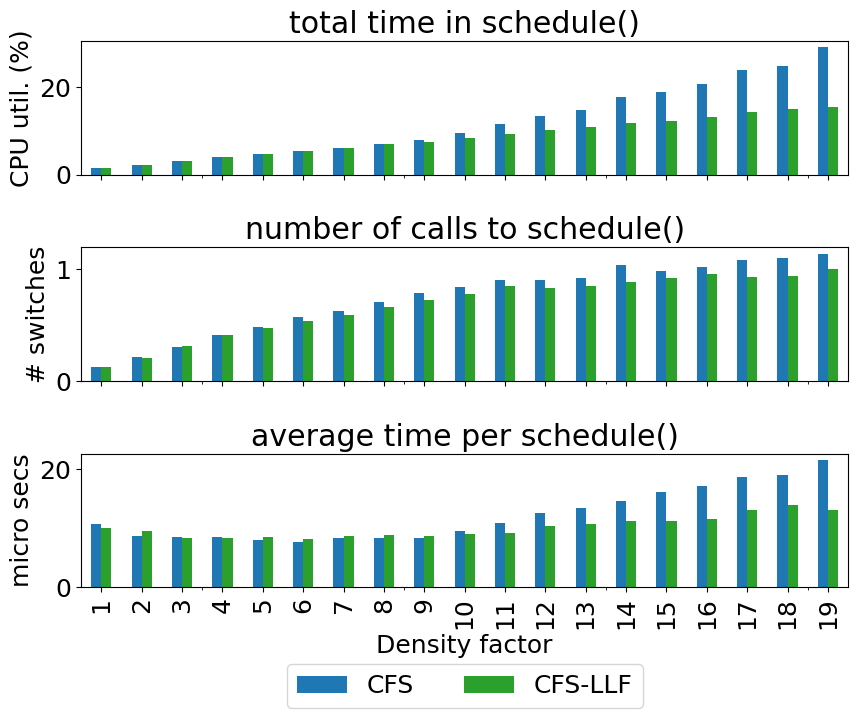

In [12]:
def visualise_overhead_solution(results_interactive, results_interactive_clean, results_tuned, results_tuned_clean):

    schedstats_interactive = [ss for _, ss, _, _,_ in list(results_interactive.values())[:]]
    schedstats_interactive_clean = [ss for _, ss, _, _,_ in list(results_interactive_clean.values())[:]]
    schedstats_tuned = [ss for _, ss, _, _,_ in list(results_tuned.values())[:]]
    schedstats_tuned_clean = [ss for _, ss, _, _,_ in list(results_tuned_clean.values())[:]]

    durations_interactive = [d for _, _, _, _,d in list(results_interactive.values())[:]]
    durations_interactive_clean = [d for _, _, _, _,d in list(results_interactive_clean.values())[:]]
    durations_tuned = [d for _, _, _, _,d in list(results_tuned.values())[:]]
    durations_tuned_clean = [d for _, _, _, _,d in list(results_tuned_clean.values())[:]]
    
    ftrace_interactive = [ftrace for _, _, _,ftrace,_ in list(results_interactive.values())[:]]
    ftrace_tuned = [ftrace for _, _, _,ftrace,_ in list(results_tuned.values())[:]]

    dfftrace_interactive = pd.DataFrame(ftrace_interactive,columns=['schedule','schedule_time','schedule_time_avg','schedule_time_std'])
    dfftrace_tuned = pd.DataFrame(ftrace_tuned,columns=['schedule_tuned','schedule_time_tuned','schedule_time_avg_tuned','schedule_time_std_tuned'])

    dfftrace = pd.concat([dfftrace_interactive, dfftrace_tuned],axis=1)
    dfftrace['func_count'] = list(results_interactive.keys())[:]
    dfftrace['density_factor'] = (dfftrace['func_count']/12).astype(int)
    
    dfftrace['duration'] = durations_interactive
    dfftrace['duration_clean'] = durations_interactive_clean
    dfftrace['duration_tuned'] = durations_tuned     
    dfftrace['duration_tuned_clean'] = durations_tuned_clean    
    
    dfftrace['tasks_running'] = [ss['tasks_running'] for ss in schedstats_interactive]
    dfftrace['tasks_running_clean'] = [ss['tasks_running'] for ss in schedstats_interactive_clean]
    dfftrace['tasks_running_tuned'] = [ss['tasks_running'] for ss in schedstats_tuned]
    dfftrace['tasks_running_tuned_clean'] = [ss['tasks_running'] for ss in schedstats_tuned_clean]
    
    dfftrace['tasks_running'] = [ss['tasks_running'] for ss in schedstats_interactive]
    dfftrace['tasks_running_clean'] = [ss['tasks_running'] for ss in schedstats_interactive_clean]
    dfftrace['tasks_running_tuned'] = [ss['tasks_running'] for ss in schedstats_tuned]
    dfftrace['tasks_running_tuned_clean'] = [ss['tasks_running'] for ss in schedstats_tuned_clean]
    

    def normalise(col, factor):
        dfftrace[col] = dfftrace[col] / factor

    to_normalise = [
        'schedule_time',
        'schedule_time_tuned',

        'tasks_running',
        'tasks_running_tuned',
        
        'tasks_running_clean',
        'tasks_running_tuned_clean',        
    
    ]
        

    for col in to_normalise:
        normalise(col, (1000000000*12))   

    for col in ['schedule_time_avg','schedule_time_avg_tuned']:
        normalise(col, (1000*12))

    dfftrace['overhead'] =  dfftrace['schedule_time'] / dfftrace['duration']
    dfftrace['overhead_tuned'] =  dfftrace['schedule_time_tuned'] / dfftrace['duration_tuned']
    
    dfftrace['schedule'] = dfftrace['schedule'] / dfftrace['schedule_tuned'].max()
    dfftrace['schedule_tuned']  =  dfftrace['schedule_tuned'] / dfftrace['schedule_tuned'].max()
    
    dfftrace['util'] = dfftrace['tasks_running_clean'] /  dfftrace['duration_clean']
    dfftrace['util_tuned'] = dfftrace['tasks_running_tuned_clean'] / dfftrace['tasks_running_tuned_clean']
    
#     p = dfftrace.plot(x='density_factor',
#                   y=['util','util_tuned'],
# #                   label=['interactive-azure','default-tuned'],
#                   color=['tab:blue','tab:orange'],
#                   kind='bar',ylabel='CPU utilisation',figsize=(15,5),width=0.9, title='CPU utilisation')

    
#     dfftrace.plot(ax=p, x='density_factor',
#                   y=['overhead','overhead_tuned'],
# #                   label=['interactive-azure','default-tuned'],
# #                   color=['tab:blue','tab:orange','tab:brown','tab:purple'],
#                   hatch='////',
#                   color='tab:grey',alpha=0.5,
#                   kind='bar',ylabel='CPU utilisation',figsize=(15,5),width=0.9, title='CPU utilisation')

    
    
#     plt.show()        
    
#     dfftrace.plot(x='density_factor',
#                   y=['schedule','schedule_tuned'],
#                   label=['CFS','OurSched'],
# #                   color=['tab:blue','tab:orange','tab:brown','tab:purple'],
#                   kind='bar',ylabel='CPU util. (norm.)',figsize=(15,5), title='# schedule()')

#     plt.show()
    
    
    fig, ax = plt.subplots(3,1,figsize=(9,8),sharex=True)            

    title='average time per schedule()'    
    
    dfftrace.plot(x='density_factor',
                  y=['schedule_time_avg','schedule_time_avg_tuned'],
                  label=['CFS','CFS-LLF'],
                  color=['tab:blue','tab:green','tab:brown'],
                  kind='bar',ylabel='micro secs', xlabel='Density factor',ax=ax[2],title=title,legend=False)
    
    print(title)

    title='number of calls to schedule()'
    
    dfftrace.plot(x='density_factor',
                  y=['schedule','schedule_tuned'],
                  label=['CFS','CFS-LLF'],
                  color=['tab:blue','tab:green','tab:brown'],
                  kind='bar',ylabel='# switches',xlabel='Density factor',ax=ax[1],title=title,legend=False)
    print(title)

    
    title='total time in schedule()'

    dfftrace.plot(x='density_factor',
                  y=['schedule_time','schedule_time_tuned'],
                  label=['CFS','CFS-LLF'],
                  color=['tab:blue','tab:green','tab:brown'],
                  kind='bar',ylabel='CPU util. (%)',xlabel='Density factor', ax=ax[0],title=title,legend=False)
    print(title)


    ax[2].legend(loc='lower center', bbox_to_anchor=(0.5, -1),ncol=3)    

    plt.tight_layout()
    

#     fig.savefig('/local/scratch/sosp25/figures/solution-overhead-anon.pdf', bbox_inches="tight")



    

    return dfftrace

visualise_overhead_solution(results_azure2021ftrace_cfs, results_azure2021ftrace_cfs, results_azure2021ftrace_llf, results_azure2021ftrace_llf)

processing 0 12
processing 1 24
processing 2 36
processing 3 48
processing 4 60
processing 5 72
processing 6 84
processing 7 96
processing 8 108
processing 9 120
processing 10 132
processing 11 144
processing 12 156
processing 13 168
processing 14 180
processing 15 192
processing 16 204
processing 17 216
processing 18 228


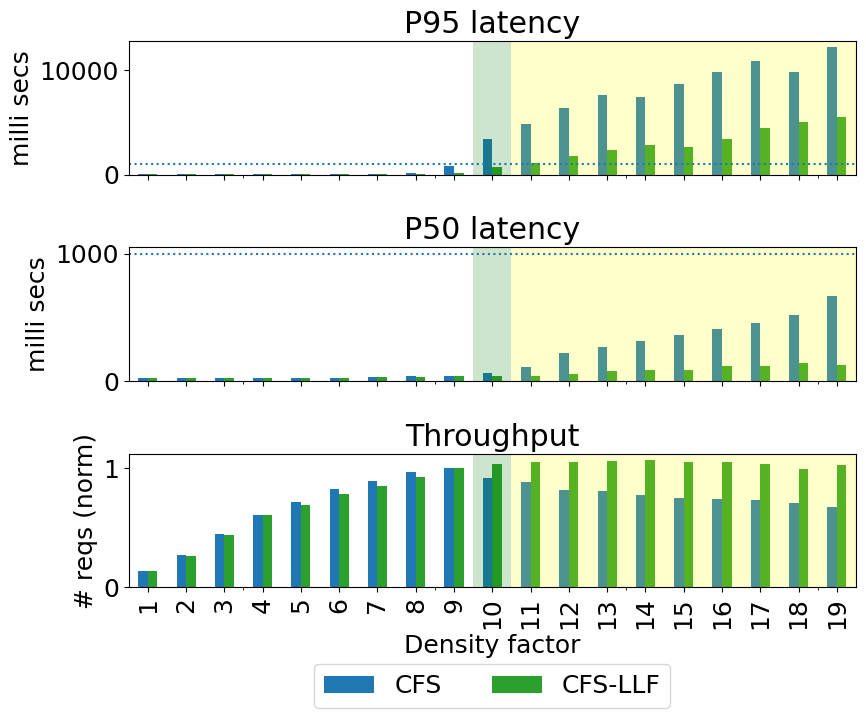

(        CFS  CFS-LLF  func_count  density
 0    22.860   22.675          12        1
 1    20.895   20.750          24        2
 2    20.040   20.160          36        3
 3    20.590   21.065          48        4
 4    22.460   22.705          60        5
 5    25.780   25.660          72        6
 6    29.210   28.440          84        7
 7    34.140   32.320          96        8
 8    38.980   36.370         108        9
 9    64.905   38.790         120       10
 10  109.100   41.340         132       11
 11  217.540   54.860         144       12
 12  267.950   76.580         156       13
 13  312.445   84.690         168       14
 14  362.165   88.380         180       15
 15  404.020  117.450         192       16
 16  458.020  113.910         204       17
 17  513.980  140.245         216       18
 18  668.005  128.080         228       19,
            CFS    CFS-LLF  func_count  density
 0      39.3900    39.4800          12        1
 1      36.6255    36.0100          24     

In [13]:

def visualise_latency_bars(results_cfs, results_llf):

    core_count = 12

    dfs_homo = [df for df, _, _, _, _ in list(results_cfs.values())[:]]

    dfs_homo_llf = [df for df, _, _, _, _ in list(results_llf.values())[:]]


    labels = list(results_cfs.keys())[:-1]


    dfs_homo = [pd.Series(df.to_numpy().flatten()) for df in dfs_homo]


    dfs_homo_llf = [pd.Series(df.to_numpy().flatten()) for df in dfs_homo_llf]


    dfb = dfs_homo[0]

    median_values = []

    tail_values = []

    throughput_values = []

    for i, func_count in enumerate(list((results_cfs.keys()))[:]):

        print("processing",i, func_count)

        df1 = dfs_homo[i]


        df3 = dfs_homo_llf[i]


        median_values.append([df1.quantile(0.5),df3.quantile(0.5)])
        tail_values.append([df1.quantile(0.95),df3.quantile(0.95)])


        throughput_values.append([df1[df1<1000].count(),
                                  df3[df3<1000].count(),])


    dfmedian = pd.DataFrame(median_values,columns=['CFS','CFS-LLF'])
    dftail = pd.DataFrame(tail_values,columns=['CFS','CFS-LLF'])
    dfthroughput = pd.DataFrame(throughput_values,columns=['CFS','CFS-LLF'])


    dfmedian['func_count'] = list(results_cfs.keys())[:]
    dftail['func_count'] = list(results_cfs.keys())[:]
    dfthroughput['func_count'] = list(results_cfs.keys())[:]

    dfmedian['density'] = [int(x/core_count) for x in list(results_cfs.keys())[:]]
    dftail['density'] = [int(x/core_count) for x in list(results_cfs.keys())[:]]
    dfthroughput['density'] = [int(x/core_count) for x in list(results_cfs.keys())[:]]
    
    
    fig, ax = plt.subplots(3,1,figsize=(9,8),sharex=True)            

    dfmedian.plot(kind='bar',x='density',
                      y=['CFS','CFS-LLF'],
                      label=['CFS','CFS-LLF'],                  
                      title='P50 latency', 
                      color=['tab:blue','tab:green'],
                      ylabel='milli secs',xlabel='Density factor',ax=ax[1],legend=False)
    ax[1].axhline(y=1000,linestyle=":")
    
    
    ax[1].axvspan(9.5, 20,facecolor='yellow', alpha=0.2)
    ax[1].axvspan(8.5, 9.5, facecolor='green', alpha=0.2)    


    dftail.plot(kind='bar',
                      y=['CFS','CFS-LLF'],
                      label=['CFS','CFS-LLF'],                
                      title='P95 latency', 
                      color=['tab:blue','tab:green'],
                      ylabel='milli secs',xlabel='Density factor',ax=ax[0],legend=False)
    
    ax[0].axvspan(9.5, 20,facecolor='yellow', alpha=0.2)
    ax[0].axvspan(8.5, 9.5, facecolor='green', alpha=0.2)
    
    
    ax[0].axhline(y=1000,linestyle=":")

    


    baseline_throughput = dfthroughput['CFS'].max()

    dfthroughput[['CFS','CFS-LLF']] =  dfthroughput[['CFS','CFS-LLF']] / baseline_throughput


    dfthroughput.plot(kind='bar',x='density',
                      y=['CFS','CFS-LLF'],
                      label=['CFS','CFS-LLF'],
                      title='Throughput', 
                      color=['tab:blue','tab:green'],
                      ylabel='# reqs (norm)',xlabel='Density factor',ax=ax[2])

    ax[2].axvspan(9.5, 20,facecolor='yellow', alpha=0.2)
    ax[2].axvspan(8.5, 9.5, facecolor='green', alpha=0.2)
    
    
    ax[2].legend(loc='lower center', bbox_to_anchor=(0.5, -1),ncol=3)    

    plt.tight_layout()
    plt.show()
    

#     fig.savefig('/local/scratch/sosp25/figures/solution-performance-anon.pdf', bbox_inches="tight")    
    
#     plt.savefig('/local/scratch/sosp25/figures/solution-azure2021-throughput.pdf', bbox_inches="tight")    

#     plt.legend(loc='lower center')


    return dfmedian, dftail, dfthroughput


visualise_latency_bars(results_azure2021ftrace_cfs,results_azure2021ftrace_llf)

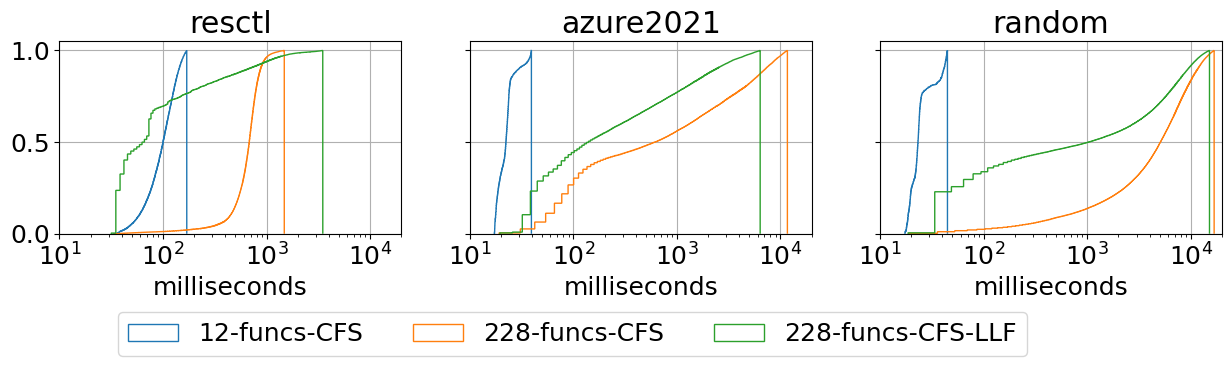

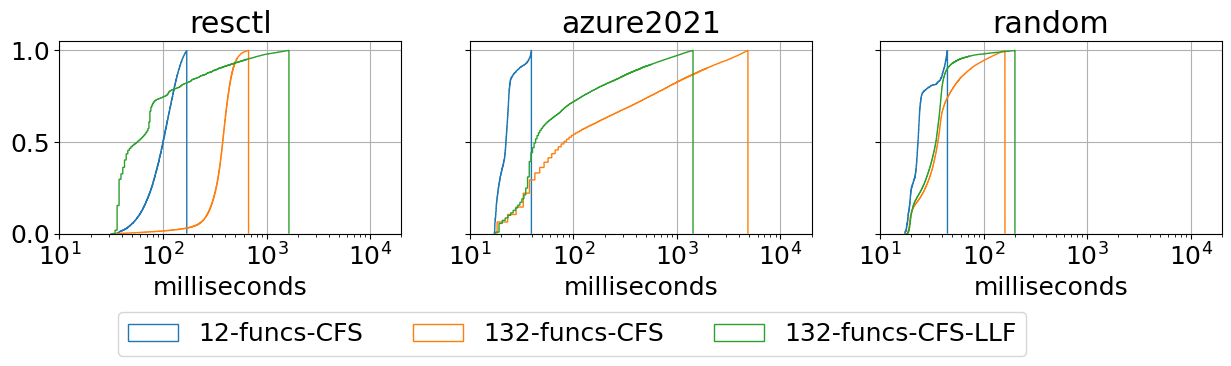

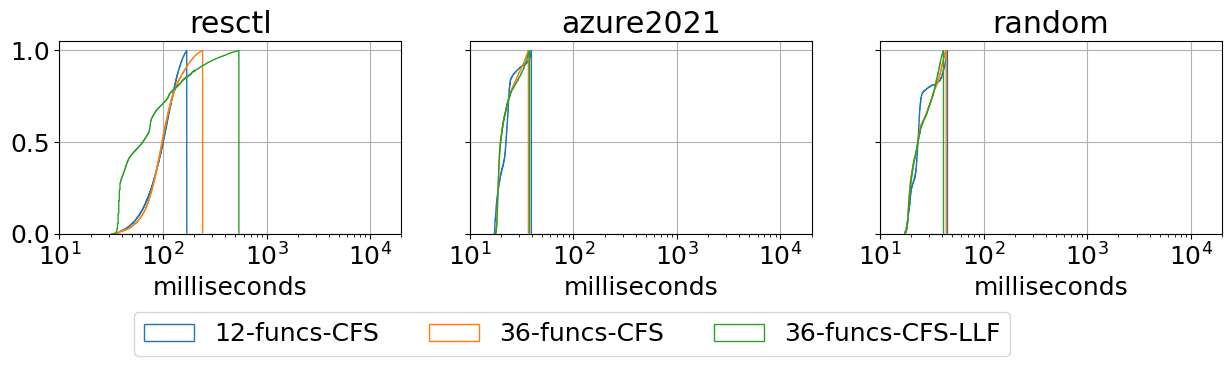

In [14]:

def visualise_latency_cdf(results_cfs, results_llf, fig, ax,workload,func_count):
    dfs = [df for df, _, _, _, _ in results_cfs.values()]
    dfs_llf = [df for df, _, _, _, _ in results_llf.values()]


    dfs = [pd.Series(df.to_numpy().flatten()) for df in dfs]
    dfs_llf = [pd.Series(df.to_numpy().flatten()) for df in dfs_llf]


    dfb = dfs[0]

    for index, count in enumerate(list(results_cfs.keys())):

#         print(index, count)
        
        if (count == func_count):

            quantile = 0.95

            dfb[dfb<dfb.quantile(quantile)].hist(cumulative=True, density=1, bins=1000,
                                                 histtype='step',
                                                  label=f'{12}-funcs-CFS',ax=ax)

            df = dfs[index]
            df[df<df.quantile(quantile)].hist(cumulative=True, density=1, bins=1000,
                                              histtype='step',
                                              label=f'{count}-funcs-CFS',ax=ax)

            df = dfs_llf[index]
            df[df<df.quantile(quantile)].hist(cumulative=True, density=1, bins=1000,
                                              histtype='step',
                                              label=f'{count}-funcs-CFS-LLF',ax=ax)     


            ax.set_title(workload,)
            ax.set_xlabel("milliseconds")

fig, ax = plt.subplots(1,3,figsize=(15,2.5),sharey=True)            
            
visualise_latency_cdf(results_notraceclean_cfs, results_notraceclean_llf,fig,ax[0],'resctl',228)
visualise_latency_cdf(results_azure2021clean_cfs, results_azure2021clean_llf,fig,ax[1],"azure2021",228)
visualise_latency_cdf(results_randomclean_cfs, results_randomclean_llf,fig,ax[2],"random",228)

ax[0].legend(loc='lower center', bbox_to_anchor=(1.5, -0.7),ncol=3)   
for a in ax:
    a.set_xscale('log')
    a.set_xlim(10,20000)
# fig.savefig('/local/scratch/sosp25/figures/solution-cdf-228funcs-anon.pdf', bbox_inches="tight")

plt.show()

fig, ax = plt.subplots(1,3,figsize=(15,2.5),sharey=True)            
            
visualise_latency_cdf(results_notraceclean_cfs, results_notraceclean_llf,fig,ax[0],'resctl',132)
visualise_latency_cdf(results_azure2021clean_cfs, results_azure2021clean_llf,fig,ax[1],"azure2021",132)
visualise_latency_cdf(results_randomclean_cfs, results_randomclean_llf,fig,ax[2],"random",132)

ax[0].legend(loc='lower center', bbox_to_anchor=(1.5, -0.7),ncol=3)   
for a in ax:
    a.set_xscale('log')
    a.set_xlim(10,20000)
# fig.savefig('/local/scratch/sosp25/figures/solution-cdf-132funcs-anon.pdf', bbox_inches="tight")


fig, ax = plt.subplots(1,3,figsize=(15,2.5),sharey=True)            
            
visualise_latency_cdf(results_notraceclean_cfs, results_notraceclean_llf,fig,ax[0],'resctl',36)
visualise_latency_cdf(results_azure2021clean_cfs, results_azure2021clean_llf,fig,ax[1],"azure2021",36)
visualise_latency_cdf(results_randomclean_cfs, results_randomclean_llf,fig,ax[2],"random",36)

ax[0].legend(loc='lower center', bbox_to_anchor=(1.5, -0.7),ncol=3)   

for a in ax:
    a.set_xscale('log')
    a.set_xlim(10,20000)



# fig.savefig('/local/scratch/sosp25/figures/solution-cdf-36funcs-anon.pdf', bbox_inches="tight")


#